In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras

#clean log dir
!rm -rf logs/

# phase one:
## load data

In [4]:
## load data and assert the correct number for data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert y_train.shape == (50000,1)

assert x_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1 )

#create val and test set
x_val = x_test[:5000]
x_test = x_test[5000:]
y_val = y_test[:5000]
y_test = y_test[5000:]


assert x_val.shape == (5000, 32, 32, 3)
assert y_val.shape == (5000, 1 )

assert x_test.shape == (5000, 32, 32, 3)
assert y_test.shape == (5000, 1 )


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Text(0.5, 1.0, 'label is [42]')

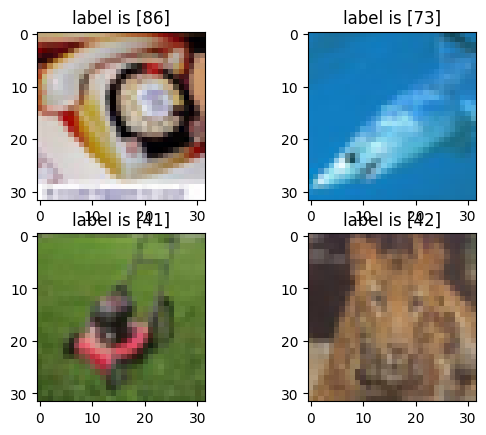

In [5]:
## Visualize some sample

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[5])
axarr[0,0].set_title(f'label is {y_train[5]}')
axarr[0,1].imshow(x_train[50])
axarr[0,1].set_title(f'label is {y_train[50]}')

axarr[1,0].imshow(x_train[500])
axarr[1,0].set_title(f'label is {y_train[500]}')

axarr[1,1].imshow(x_train[5000])
axarr[1,1].set_title(f'label is {y_train[5000]}')


# phase 2:
## create model
 1.  we will use panda method.
 2. would use rescale layer
 3. would use 2 convs and2 maxpool
 4. would use 3 dense with Relu



In [6]:
#prepare layers

from tensorflow.keras import regularizers

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.15),  # Increased rotation range
    keras.layers.RandomZoom(0.2),       # More aggressive zoom
    keras.layers.RandomContrast(0.1),   # New: Helps with lighting variations
])

model = keras.Sequential([
    keras.layers.InputLayer((32, 32, 3)),
    data_augmentation,
    keras.layers.Rescaling(1./255),

    # Block 1 (32 filters)
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),  # Stabilizes training
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),         # Reduced from 0.3

    # Block 2 (64 filters)
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.3),          # Reduced from 0.4

    # Block 3 (128 filters)
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.4),          # Reduced from 0.5

    # Classifier
    keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),          # New: Extra dropout
    keras.layers.Dense(100, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 511,876 (1.95 MB)

 Trainable params: 510,980 (1.95 MB)

 Non-trainable params: 896 (3.50 KB)

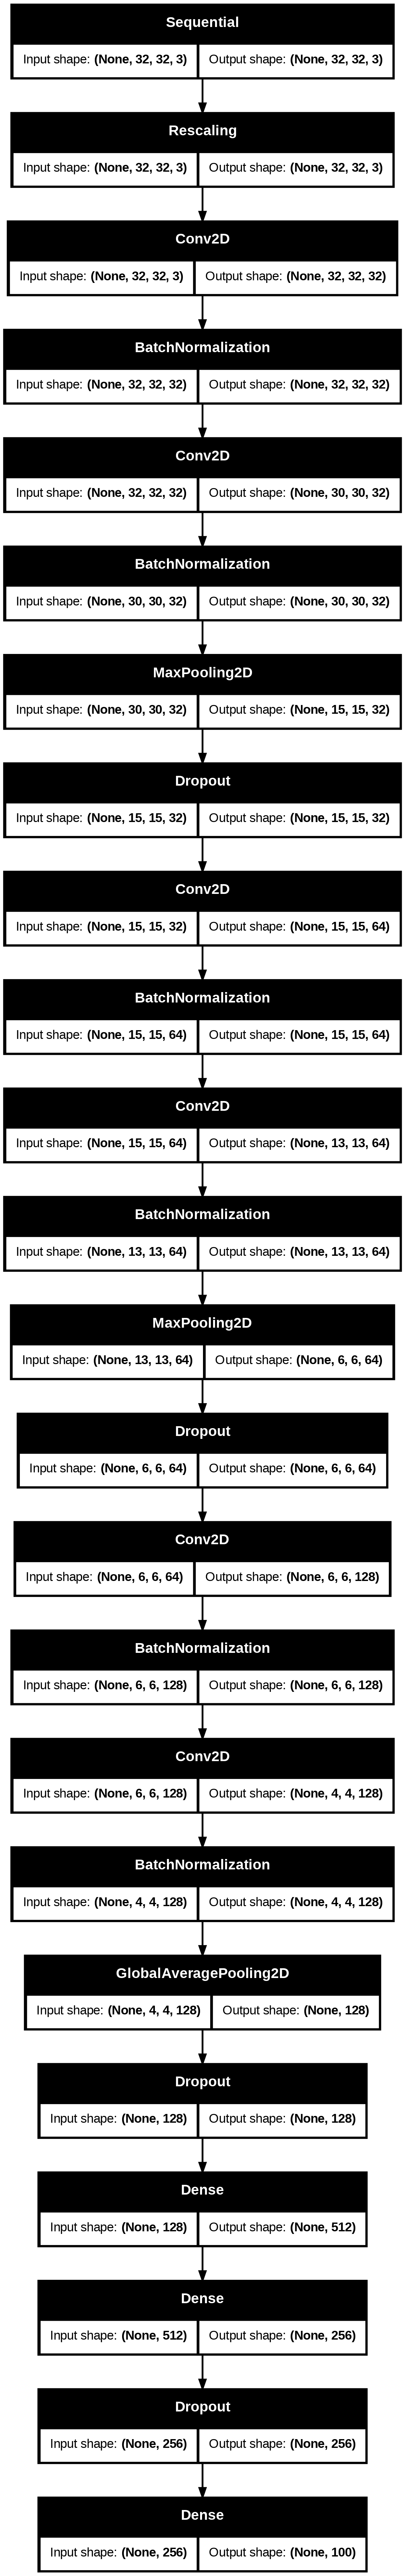

In [7]:
keras.utils.plot_model(model, show_shapes=True)



In [8]:
#model seems good
#procced to compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'],
             )

In [9]:
#custom call  back for +90 percent acc
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when the accuravy rise  above 90%

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from the training epoch
        '''

        # Check the loss
        if logs['val_acc'] > 80:

            # Stop if threshold is met
            print("\nLoss is lower than 0.4 so cancelling training!")
            self.model.stop_training = True
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

In [10]:
epochs = 50
history = model.fit(x=x_train, y=y_train, batch_size=128,
                    validation_data=(x_val,y_val),
                    callbacks = [
                        myCallback(),
                        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5),
                        tensorboard_callback,
                        ],epochs=epochs,
                        )

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - acc: 0.0531 - loss: 4.7609 - val_acc: 0.0326 - val_loss: 4.8474 - learning_rate: 5.0000e-04
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - acc: 0.1267 - loss: 4.0362 - val_acc: 0.1816 - val_loss: 3.6410 - learning_rate: 5.0000e-04
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - acc: 0.1652 - loss: 3.7204 - val_acc: 0.2232 - val_loss: 3.3485 - learning_rate: 5.0000e-04
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - acc: 0.2018 - loss: 3.4910 - val_acc: 0.1876 - val_loss: 3.5133 - learning_rate: 5.0000e-04
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - acc: 0.2159 - loss: 3.3542 - val_acc: 0.2466 - val_loss: 3.1013 - learning_rate: 5.0000e-04
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - acc: 0.2343 - loss: 3.2171 - val_acc: 0.2158 - val_loss: 3.3151 - learning_rate: 5.0000e-04
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - acc: 0.2497 - loss: 3.1163 - val_acc: 0.2804 - val_loss:

In [11]:
model.save('Cifar100-pure.keras')

In [12]:
model.evaluate(x=x_test, y=y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4762 - loss: 1.9995


[2.0264170169830322, 0.4731999933719635]

In [ ]:
%tensorboard --bind_all --logdir logs  --port 7776

